In [1]:
from itertools import product

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn import metrics


# Import and clean the data

In [2]:
df= pd.read_csv('final_train.csv')

In [3]:
df_copy_all=df

In [4]:
df=df.drop('+/-',axis=1)
df=df.drop('W/L',axis=1)
df=df.drop('GAME DATE',axis=1)
df=df.drop('Unnamed: 0',axis=1)
df=df.drop('TEAM',axis=1)
df=df.drop('OPP',axis=1)

In [5]:
df_train=df
#copy for future use

In [6]:
X=df.values

In [7]:
X

array([[ 48.   ,   0.607,   0.293, ...,   1.   ,   0.   ,   0.   ],
       [ 48.   ,   0.537,   0.195, ...,   0.   ,   0.   ,   0.   ],
       [ 48.   ,   0.42 ,   0.23 , ...,   0.   ,   0.   ,   0.   ],
       ..., 
       [ 48.   ,   0.493,   0.264, ...,   0.   ,   1.   ,   2.   ],
       [ 48.   ,   0.462,   0.151, ...,   0.   ,   1.   ,   2.   ],
       [ 48.   ,   0.548,   0.386, ...,   1.   ,   3.   ,   2.   ]])

In [10]:
y1=df_copy_all.values[:,-2]
y1=y1.astype('int')

# Important features selection

In [11]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import datasets

model = ExtraTreesClassifier()
model.fit(X, y1)
# display the relative importance of each attribute
print(model.feature_importances_)

[ 0.          0.23682772  0.06707209  0.07296191  0.0676971   0.24185736
  0.06418778  0.07879752  0.06980794  0.02243323  0.0400651   0.03829226]


# Task 1: Testing Machine Learning Accuracy

# Step 1: Fit in Random Forest Classifier

# Split training and testing sets

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y1,test_size=0.2)

# Select best Hyperparameters

In [13]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()


params = {'n_estimators':[10,20,30,40],'max_depth': [2, 4, 8, 16], 'min_samples_leaf':[2, 4, 8],'max_features': [0.2,0.3,0.4, 0.8,1.0]}

RFgrid = GridSearchCV(estimator=clf, param_grid=params, cv=3, scoring = 'accuracy')
RFgrid.fit(X_train,y_train)
print('The best score is', RFgrid.best_score_)
print('The best parameters are', RFgrid.best_params_)

The best score is 0.879573170732
The best parameters are {'max_depth': 16, 'max_features': 0.3, 'min_samples_leaf': 2, 'n_estimators': 40}


# Confusion Matrix Accuracy


In [14]:
rf = RandomForestClassifier(n_estimators = 16, min_samples_leaf = 2,max_features = 0.3, max_depth = 40)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[212  34]
 [ 27 219]]


# ROC Accuracy

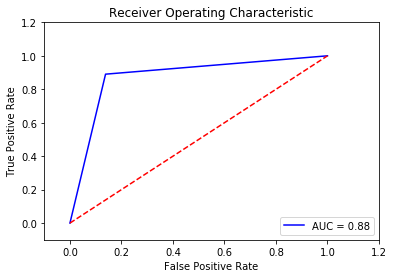

In [15]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random
actual = y_test
predictions=y_pred
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Metrics accuracy

In [16]:
scores = []
for rs in range(1,20):
    X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=.2, random_state=rs)
    rf = RandomForestClassifier(n_estimators = 16, min_samples_leaf = 2,max_features = 0.2, max_depth = 40)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
scores = np.array(scores)    
i = np.argmax(scores)
print('best [k, score] = [%g, %g], mean score = '%(i+1, scores[i]), scores.mean())


best [k, score] = [19, 0.902439], mean score =  0.859863072315


# Cross-validation Accuracy

In [17]:
from sklearn.model_selection import cross_val_score
import numpy as np
# 10-fold cross-validation
rf = RandomForestClassifier(n_estimators = 16, min_samples_leaf = 2,max_features = 0.2, max_depth = 40)
scores = cross_val_score(rf, X, y1, cv=10, scoring='accuracy')
print('scores are:',scores)
print('mean of scores is:',scores.mean())



scores are: [ 0.84552846  0.86585366  0.90650407  0.82926829  0.87804878  0.86178862
  0.87398374  0.8699187   0.87398374  0.88617886]
mean of scores is: 0.869105691057


# Step 2: Fit in Logistic Model

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y1,test_size=0.2)

# Select best Hyperparameters

In [19]:
from sklearn.linear_model import LogisticRegression


clf = LogisticRegression()

params = {'C': [0.01, 0.1, 0.8, 0.9, 1,10],
          'penalty': ['l1','l2'], 
          'class_weight':['balanced', None]}
          
          
LRgrid = GridSearchCV(estimator=clf, param_grid=params, cv=3, scoring = 'accuracy')
LRgrid.fit(X_train, y_train)
print('The best score is', LRgrid.best_score_)
print('The best parameters are', LRgrid.best_params_)

The best score is 0.94512195122
The best parameters are {'C': 10, 'class_weight': None, 'penalty': 'l1'}


# Confusion Matrix Accuracy

In [20]:
lr=LogisticRegression(penalty = 'l1', class_weight = None, C = 10)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[237  20]
 [ 11 224]]


# ROC Accuracy

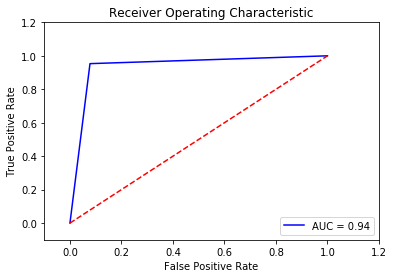

In [21]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random
actual = y_test
predictions=y_pred
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Metrics Accuracy

In [22]:
scores = []
for rs in range(1,20):
    X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=.2, random_state=rs)
    lr=LogisticRegression(penalty = 'l1', class_weight = 'balanced', C = 10)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
scores = np.array(scores)    
i = np.argmax(scores)
print('best [k, score] = [%g, %g], mean score = '%(i+1, scores[i]), scores.mean())

best [k, score] = [2, 0.95935], mean score =  0.945656824989


# Cross-validation Accuracy

In [23]:
from sklearn.model_selection import cross_val_score
import numpy as np
# 10-fold cross-validation
lr=LogisticRegression(penalty = 'l1', class_weight = 'balanced', C = 10)
scores = cross_val_score(lr, X, y1, cv=10, scoring='accuracy')
print('scores are:',scores)
print('mean of scores is:',scores.mean())



scores are: [ 0.94308943  0.95121951  0.97560976  0.92682927  0.96747967  0.89430894
  0.93495935  0.96747967  0.94308943  0.96341463]
mean of scores is: 0.94674796748
